In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
#import API key
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90,90, 1500)
lngs = np.random.uniform(-180,180, 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
#Create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates :
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)


631

In [16]:
cities[0]

'rikitea'

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
#Import the time library and the dtetime module from the dtaetime library
import time
from datetime import datetime
#import the requests
import requests

In [20]:
#Create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | ushtobe
Processing Record 3 of Set 1 | zhigansk
Processing Record 4 of Set 1 | waingapu
Processing Record 5 of Set 1 | bay roberts
Processing Record 6 of Set 1 | laguna
Processing Record 7 of Set 1 | pafos
Processing Record 8 of Set 1 | bhinga
Processing Record 9 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 10 of Set 1 | kearney
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | coquimbo
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | koslan
Processing Record 23 of Set 1 

In [21]:
len(city_data)

583

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,74.70,78,82,9.75,PF,2021-11-05 21:11:56
1,Ushtobe,45.2514,77.9838,12.20,73,1,9.44,KZ,2021-11-05 21:11:56
2,Zhigansk,66.7697,123.3711,4.64,95,100,23.71,RU,2021-11-05 21:11:57
3,Waingapu,-9.6567,120.2641,80.65,80,100,3.36,ID,2021-11-05 21:11:57
4,Bay Roberts,47.5999,-53.2648,41.50,75,100,4.00,CA,2021-11-05 21:11:57
5,Laguna,38.4210,-121.4238,71.44,68,1,3.00,US,2021-11-05 21:11:58
6,Pafos,34.7667,32.4167,66.11,72,9,9.22,CY,2021-11-05 21:11:58
7,Bhinga,27.7167,81.9333,62.04,66,97,5.14,IN,2021-11-05 21:11:58
8,Kearney,40.6995,-99.0815,68.56,45,1,10.00,US,2021-11-05 21:11:59
9,Punta Arenas,-53.1500,-70.9167,57.31,47,40,35.68,CL,2021-11-05 21:11:59


In [26]:
#Create Variable for new column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [28]:
#Reorder columns of cit_data_df
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-11-05 21:11:56,-23.1203,-134.9692,74.70,78,82,9.75
1,Ushtobe,KZ,2021-11-05 21:11:56,45.2514,77.9838,12.20,73,1,9.44
2,Zhigansk,RU,2021-11-05 21:11:57,66.7697,123.3711,4.64,95,100,23.71
3,Waingapu,ID,2021-11-05 21:11:57,-9.6567,120.2641,80.65,80,100,3.36
4,Bay Roberts,CA,2021-11-05 21:11:57,47.5999,-53.2648,41.50,75,100,4.00
5,Laguna,US,2021-11-05 21:11:58,38.4210,-121.4238,71.44,68,1,3.00
6,Pafos,CY,2021-11-05 21:11:58,34.7667,32.4167,66.11,72,9,9.22
7,Bhinga,IN,2021-11-05 21:11:58,27.7167,81.9333,62.04,66,97,5.14
8,Kearney,US,2021-11-05 21:11:59,40.6995,-99.0815,68.56,45,1,10.00
9,Punta Arenas,CL,2021-11-05 21:11:59,-53.1500,-70.9167,57.31,47,40,35.68


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [33]:
#iMPORT The time module
import time
# Get today's date in seconds.
# today = time.time()
#Convert today to  mm/dd/yy
today = time.strftime("%x")
today

'11/05/21'

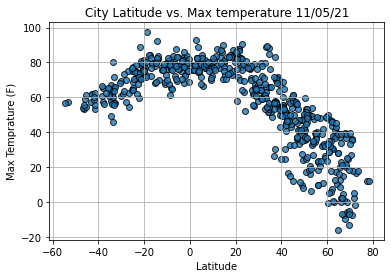

In [43]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps,
            edgecolor = "black", linewidths=1, marker = "o",
            alpha =0.8, label ="Cities")

#Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max temperature {time.strftime("%x")}')
plt.ylabel("Max Temprature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


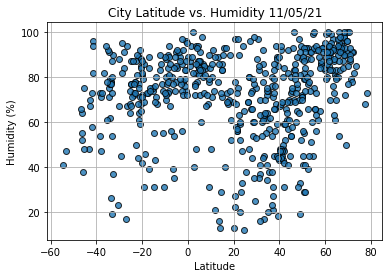

In [39]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

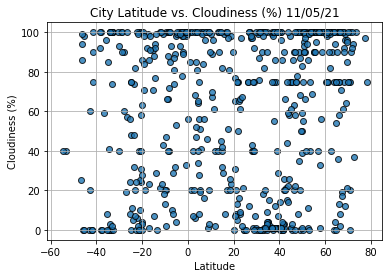

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

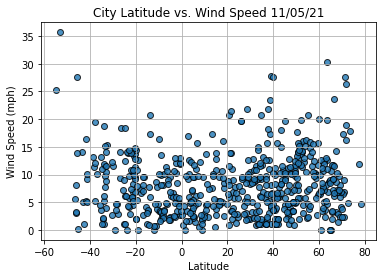

In [45]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [98]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2021-11-05 21:12:00
Lat                       42.6001
Lng                      -73.9662
Max Temp                    47.68
Humidity                       52
Cloudiness                     66
Wind Speed                   5.93
Name: 13, dtype: object

In [49]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ushtobe,KZ,2021-11-05 21:11:56,45.2514,77.9838,12.20,73,1,9.44
2,Zhigansk,RU,2021-11-05 21:11:57,66.7697,123.3711,4.64,95,100,23.71
4,Bay Roberts,CA,2021-11-05 21:11:57,47.5999,-53.2648,41.50,75,100,4.00
5,Laguna,US,2021-11-05 21:11:58,38.4210,-121.4238,71.44,68,1,3.00
6,Pafos,CY,2021-11-05 21:11:58,34.7667,32.4167,66.11,72,9,9.22
...,...,...,...,...,...,...,...,...,...
577,Esna,EG,2021-11-05 21:27:07,25.2934,32.5540,77.04,38,0,7.85
578,Hovd,MN,2021-11-05 21:27:08,48.0056,91.6419,11.59,31,8,1.88
580,West Plains,US,2021-11-05 21:27:09,36.7281,-91.8524,56.61,38,1,1.01
581,Santa Cruz De Tenerife,ES,2021-11-05 21:27:09,28.4682,-16.2546,71.22,79,75,5.01


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

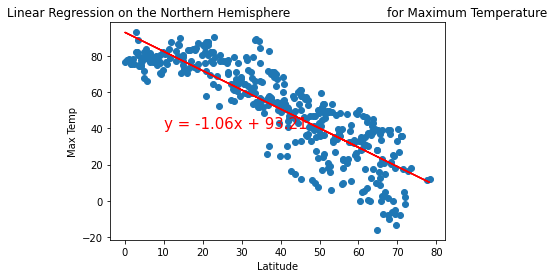

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

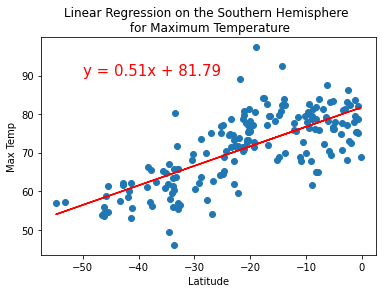

In [84]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

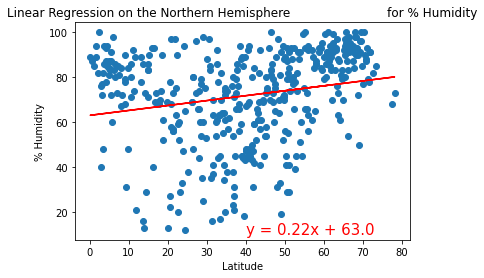

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

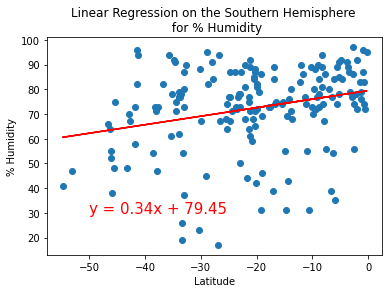

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

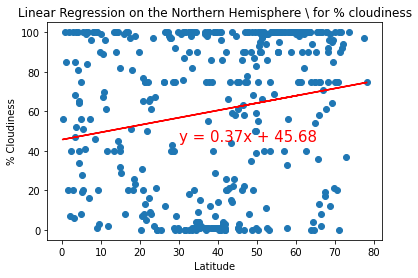

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % cloudiness', '% Cloudiness',(30,45))

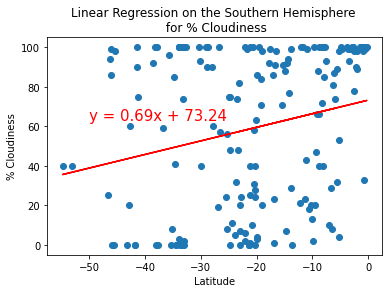

In [100]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,63))

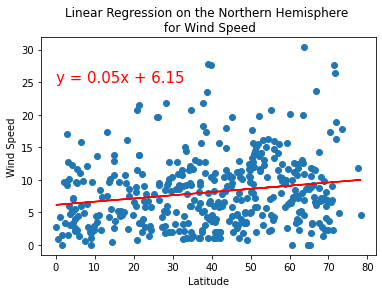

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,25))